In [1]:
from IPython.core.display import HTML
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from growth.sweep.simulation import GrowthSimulation
import numpy as np

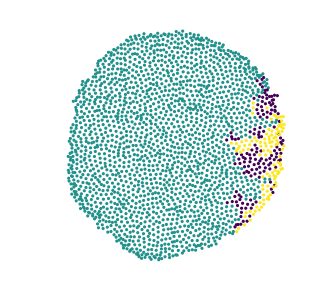

In [6]:
division = 0.1
recombination = 0.1
start = 1
duration = 4.
population = 11

culture = GrowthSimulation(division, recombination, start, duration, population)
culture.run()

culture.plot(colorby='genotype', cmap=plt.cm.viridis, s=10)

In [4]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [5]:
HTML(genotype_video)

In [24]:
np.logspace(-3, 0, 1, base=2)

array([0.125])

In [25]:
np.log2(1)

0.0

In [27]:
np.log2(.15)

-2.736965594166206

In [6]:
cell = Cell()

In [8]:
cell.divide()

In [5]:
from growth.cells.cells import Cell
from functools import reduce
from operator import add

In [82]:
recombination_start = 1
recombination_rate = 0.1
recombination_duration = 3


# define seed
seed = [Cell()]

while len(seed) < 8:
    population = len(seed)
    
    # determine whether recombination is active
    is_before = population < 2**recombination_start
    is_after = population >= 2**(recombination_start+recombination_duration)    
    if is_before or is_after:
        rate = 0.
    else:
        rate = recombination_rate
    
    # choose a random cell for division
    cell_id = np.random.randint(0, population)
    seed.extend(seed.pop(cell_id).divide(rate))

    
print(len(seed))
print(sum([c.genotype==1 for c in seed]))

8
8


8
0


0

In [ ]:
cell.grow()

In [13]:
np.linspace(0, 7, 16)

array([0.        , 0.46666667, 0.93333333, 1.4       , 1.86666667,
       2.33333333, 2.8       , 3.26666667, 3.73333333, 4.2       ,
       4.66666667, 5.13333333, 5.6       , 6.06666667, 6.53333333,
       7.        ])

array([0., 0., 0., ..., 0., 0., 0.])

# Simulation video

In [ ]:
%%capture
lineage_video = culture.animate(interval=200, colorby='lineage', cmap=plt.cm.rainbow, repeat_delay=5000)
genotype_video = culture.animate(interval=200, colorby='genotype', cmap=plt.cm.viridis, repeat_delay=5000)

In [ ]:
# play video
HTML(genotype_video)

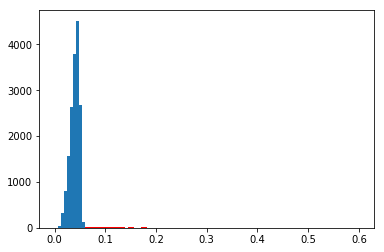

In [18]:
edges = culture.triangulation.edge_list
edge_lengths = culture.triangulation.evaluate_edge_lengths(edges, *culture.xy.T)

bins = np.linspace(0, 0.6, 100)
_ = plt.hist(edge_lengths, bins=bins)
outlier_mask = culture.triangulation.is_outlier(edge_lengths, 2)
_ = plt.hist(edge_lengths[outlier_mask], bins=bins, color='r')

In [70]:
from matplotlib.collections import LineCollection
import numpy as np
ind = np.argsort(lengths, axis=1)

In [15]:
culture.triangulation.edge_lengths

array([0.29953946, 0.56802293, 0.1455573 , ..., 0.06966834, 0.07506553,
       0.07506553])

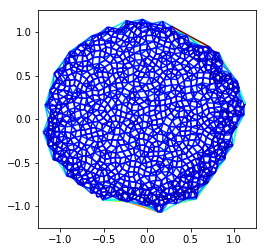

In [27]:
edges = culture.triangulation.edges
edge_lengths = culture.triangulation.evaluate_edge_lengths(edges, *culture.xy.T)


cmap = plt.cm.jet
norm = Normalize(edge_lengths.min(), edge_lengths.max())


fig, ax = plt.subplots()
pts = culture.xy[edges]

lines = LineCollection(pts, colors=cmap(norm(edge_lengths)))
ax.add_collection(lines)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect(1)